# 21-1. 들어가며

이전 노드에서 Linear 레이어 및 다양한 Convolution 레이어에 대해 살펴보았습니다. 이제 Weight라는 개념을 어느 정도는 이해하셨겠죠? 그렇다면 지금 만날 친구들과도 쉽게 친해질 수 있답니다. 😉

이번 코스에서는 **Embedding 레이어**와 **RNN 레이어**에 대해 배워볼 거예요. 저 두 친구는 자연어 처리에서 많이 사용되기 때문에 그에 관심이 있다면 **집중!** 성공적으로 마치고 나면 이전 코스까지 합쳐 딥러닝 전반에 사용되는 모든 레이어를 다룰 수 있는 상태가 될 겁니다. 그 순간까지 파이팅해 보죠!

### 학습 목표
---
1. 레이어의 개념을 이해한다.
2. 딥러닝 모델 속 각 레이어(Embedding, RNN, LSTM)의 동작 방식을 이해한다.
3. 데이터의 특성을 고려한 레이어를 설계하고, 이를 Tensorflow로 정의하는 법을 배운다.

### 목차
---
1. 분포가설과 분산표현
2. 단어를 부탁해! Embedding 레이어
3. 순차적인 데이터! Recurrent 레이어 (1) RNN
4. 순차적인 데이터! Recurrent 레이어 (2) LSTM
5. 마무리


# 21-2. 분포가설과 분산표현

컴퓨터의 시각적 능력을 위해 Convolution 레이어가 필요했다면, 이번엔 언어적 능력에 대한 이야기를 해보죠!

컴퓨터에게 바나나와 사과를 가르칠 수 있을까요? 쉽게 어떤 방법이 떠오르지는 않는데... 일단 서로 구별은 할 수 있어야 할 테니 그냥 바나나는 [1] 이고 사과는 [0] 이라고 순번을 매겨 볼까요? 길쭉하고 동그라니 나쁘지 않네요 🤣 잠깐, 그럼 배는 어떡하죠? 사과의 모양과 바나나의 색깔을 가진... 그냥 [2] 라고 표현하면 될까요?

단어 순서대로 순번을 매기는 것은 편하지만 이를 컴퓨터에게 가르쳤다고 표현하기엔 조금 부끄러운 것 같네요... 그래도 사과와 배가 비슷한 모양을 가지고, 배와 바나나가 비슷한 색깔을 갖는다는 것 정도는 알았으면 좋겠는데요! 하지만 우리가 임의로 순번을 매겼다고 배 [2] 가 사과 [0] 보다 바나나 [1] 에 더 비슷하다고는 도저히 할 수 없겠군요. 이런 방법으로는 컴퓨터에게 도저히 단어의 의미를 알려주긴 어렵겠습니다.

그럼 이런 방법은 어떨까요? 단 하나의 정수로 단어를 표현하는 대신, 2차원 이상의 벡터로 단어를 표현하는 거죠! 위의 과일 친구들은 사과: [ 0, 0 ] , 바나나: [ 1, 1 ] , 배: [ 0, 1 ] 정도로 표현할 수 있겠네요. 첫 번째 요소는 모양(0:둥글다, 1:길쭉하다)을 나타내고, 두 번째 모양은 색상(0:빨강, 1:노랑)을 나타내는 거죠! 배는 모양 기준으로는 사과와 가깝고, 색상 기준으로는 바나나와 가깝다는 것이 아주 잘 표현되고 있습니다. 😎

그런데 여전히 문제는 남아 있습니다. 우리가 이런 방식으로 모든 단어를 표현하려고 한다면 도대체 몇 차원의 벡터가 필요한 걸까요? 모양과 색상 말고도 세상에는 수많은 의미 범주가 있습니다. 단어 벡터의 각 차원마다 고유의 의미를 부여하는 방식으로는 오래지 않아 한계에 부딪히게 됩니다. 😥

이렇게 벡터의 특정 차원에 단어 혹은 의미를 직접 매핑하는 방식을 **희소 표현(Sparse Representation)** 이라고 합니다.

### 단어의 분산 표현(Distributed Representation)
---
그럼 방법을 바꿔 봅시다. 모든 단어를 고정 차원 (예를 들어 256차원)의 벡터로 표현하는 것입니다. 그러나 어떤 차원이 특정한 의미를 가진다고 가정하지 않을 것입니다. 단지 이런 가정을 할 것입니다. **유사한 맥락에서 나타나는 단어는 그 의미도 비슷하다** 라는 것입니다. 이것을 **분포 가설(distribution hypothesis)** 이라고 합니다.

여기서 맥락이라는 것은 단순하게는 단어 좌우에 출현하는 다른 단어들입니다. 아주 간단히 이해하면 이렇습니다.

- 나는 밥을 먹는다.
- 나는 떡을 먹는다.
- 나는 _을 먹는다.

나는 과 먹는다 사이에 주로 나타나는 것들 사이에 어떤 의미적인 유사점이 있죠? 그렇다고 컴퓨터에게 이 유사점이 무엇인지를 알려줄 방법은 없습니다. 우리는 지금 모든 단어를 고정 차원의 벡터로 표현하려고 합니다. 여기서 우리가 할 수 있는 것은 그저 유사한 맥락에 나타난 단어들끼리는 두 단어 벡터 사이의 거리를 가깝게 하고, 그렇지 않은 단어들끼리는 멀어지도록 조금씩 조정해 주는 것뿐입니다. 이런 방식으로 얻어지는 단어 벡터를 단어의 **분산 표현(Distributed Representation)** 이라고 합니다. 위에서 활용했던 방법들과는 달리, 벡터의 특정 차원이 특정 의미를 담고 있는 것이 아니라 의미가 벡터의 여러 차원에 분산되어 있으리라고 여기게 됩니다.

> 분산 표현을 사용하면 희소 표현과는 다르게 단어 간의 유사도 를 계산으로 구할 수 있다는 장점이 있습니다!

다음 스텝에 다루게 될 **Embedding 레이어** 는 바로 단어의 분산 표현을 구현하기 위한 레이어입니다. 간단하게 컴퓨터용 단어 사전인 셈이죠! 우리가 "단어 n개 쓸 거야~ k차원으로 표현해줘~" 라고 전달하면 컴퓨터가 알아서 n x k 형태의 분산 표현 사전을 만듭니다. 이것이 곧 Weight이고 파라미터입니다! 그리고 다른 레이어가 그랬듯이 수많은 데이터를 통해 적합한 파라미터를 찾아가게 되죠.

하지만 이러한 분산 표현은 비단 단어를 표현하는 데에만 사용되는 것이 아니라, 의미적 유사성을 가지는 여러 가지 것들을 컴퓨터에게 가르치는 방법으로 두루 활용됩니다.

Q1. Embedding 레이어는 신경망 훈련 도중에 업데이트되는 것이 일반적이지만, Embedding 레이어만을 훈련하기 위한 방법들도 있습니다. 직접 알아보고 대표적인 방법을 한 가지 이상 적어봅시다.
A1. ELMo, Word2Vec, Glove, FastText 등

# 21-3. 단어를 부탁해! Embedding 레이어

Embedding 레이어는 아주 쉬운데, 간단하게 말하면 컴퓨터용 단어 사전입니다. 우리가 "단어를 n개 쓸 거야~" 라고 전달만 해주면 컴퓨터는 알아서 사전을 만들고, 수많은 데이터를 거치며 각 단어의 의미(분산 표현)를 차근차근 업데이트합니다.

그리고 우린 "단어를 더 깊게 표현해~" 라고도 말해줄 수 있습니다. Embedding 사이즈를 정해주면서 말이죠. 그럼 Weight는 자연스럽게 단어의 개수, Embedding 사이즈로 정의됨을 알 수 있습니다. 이렇게 정의된 Embedding 레이어는 아래 그림과 같은 모습을 가지게 됩니다.

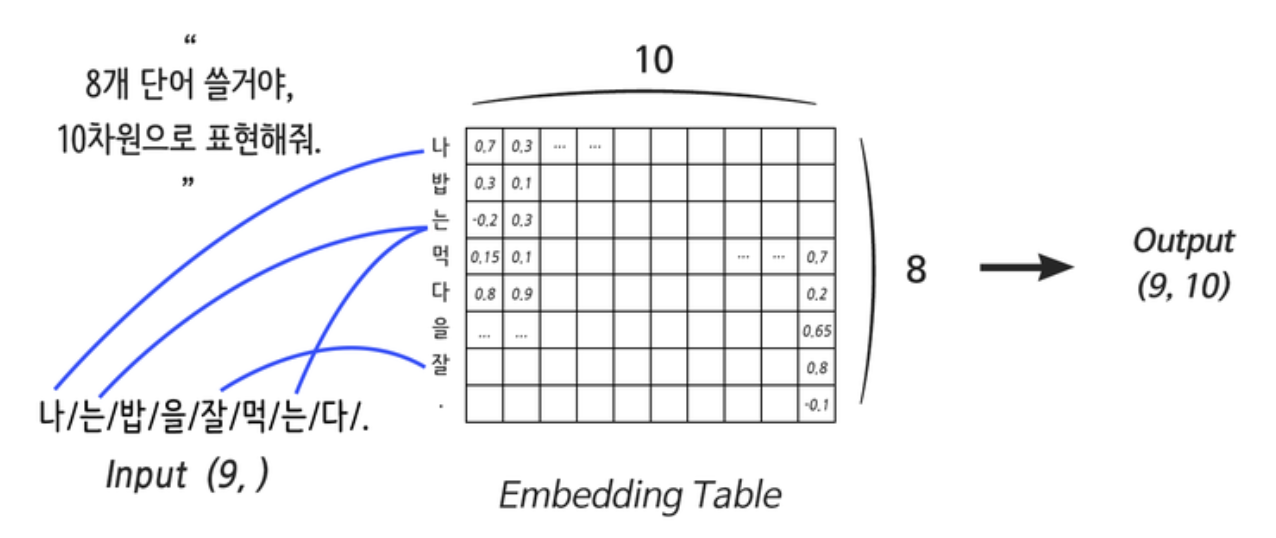

Embedding 레이어는 입력으로 들어온 단어를 분산 표현으로 연결해 주는 역할을 하는데 그것이 Weight에서 특정 행을 읽어오는 것과 같아 이 레이어를 **룩업 테이블(Lookup Table)** 이라고 부르기도 합니다. 미스터리로 남은 부분도 바로 여기죠, 단어가 룩업 테이블에 매핑되는 부분! 어떤 원리로 동작하는 걸까요?

이를 이해하기 위해서는 **원-핫 인코딩(One-hot Encoding)**을 먼저 알아야 합니다. 유명한 개념이기 때문에 금방 양질의 정리 글들을 찾아낼 수 있죠. 그중에 필자는 아래 웹페이지를 추천합니다! **원-핫 인코딩(one-hot encoding)** 부분을 잘 읽고, **단어 임베딩(word embedding)** 부분은 참고하는 정도로 충분하겠어요!

- 단어 간 유사도 파악 방법 - 카카오브레인 (https://www.kakaobrain.com/blog/6)

Q2. 인간, 펭귄, 오리, 문어, 사람을 순서대로 원-핫 인코딩을 사용해서 표현하면 오리는 어떻게 표현되나요?
A2. [ 0, 0, 1, 0, 0 ]

Q3. 원-핫 벡터로 표현된 서로 다른 두 단어가 항상 직교한다는 것은 무엇을 의미하나요?
A3. 모든 단어가 단어 간 관계를 전혀 반영하지 못한 채 각각 독립적인 상태로 존재하게 된다.

어떻습니까? 본질적으로 원-핫 인코딩 그 자체는 이전 스텝에서 잠깐 다루었던 **단어에 순번(인덱스)을 매겨서 표현하는** 방식에 지나지 않습니다. 하지만 이 방식이 오늘 다룰 Embedding 레이어와 결합하여 매우 유용하게 사용될 수 있음을 보여드리겠습니다.

재밌는 상상을 한 번 해봅시다. 선형변환 담당 Linear 레이어를 잊지 않았죠? 원-핫 인코딩에 Linear 레이어를 적용하면 어떻게 될까요? 단 하나의 인덱스만 1이고 나머지가 모두 0인 극단적인 벡터지만 어쨌건 고차원 벡터이니 적용해볼 수 있잖아요! 백문이 불여일견, 소스로 한 번 확인해보죠, 우선 원-핫 벡터를 먼저 생성합니다!

In [1]:
import tensorflow as tf

vocab = {      # 사용할 단어 사전 정의
    "i": 0,
    "need": 1,
    "some": 2,
    "more": 3,
    "coffee": 4,
    "cake": 5,
    "cat": 6,
    "dog": 7
}

sentence = "i i i i need some more coffee coffee coffee"
# 위 sentence
_input = [vocab[w] for w in sentence.split()]  # [0, 0, 0, 0, 1, 2, 3, 4, 4, 4]

vocab_size = len(vocab)   # 8

one_hot = tf.one_hot(_input, vocab_size)
print(one_hot.numpy())    # 원-핫 인코딩 벡터를 출력해 봅시다.

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]]


어때요, 원-핫 인코딩의 결과가 여러분이 상상한 것과 동일한가요? 이제 생성된 원-핫 벡터를 Linear 레이어에 넣어보죠. 놀라운 결과가 기다리고 있답니다..!

In [2]:
distribution_size = 2   # 보기 좋게 2차원으로 분산 표현하도록 하죠!
linear = tf.keras.layers.Dense(units=distribution_size, use_bias=False)
one_hot_linear = linear(one_hot)

print("Linear Weight")
print(linear.weights[0].numpy())

print("\nOne-Hot Linear Result")
print(one_hot_linear.numpy())

Linear Weight
[[ 0.5156324  -0.04956466]
 [ 0.66684914  0.60318077]
 [ 0.40964556  0.202043  ]
 [-0.04889172  0.6869625 ]
 [-0.74484557  0.49291193]
 [ 0.13326287  0.52894306]
 [-0.56125546 -0.7114264 ]
 [ 0.47395158 -0.37158203]]

One-Hot Linear Result
[[ 0.5156324  -0.04956466]
 [ 0.5156324  -0.04956466]
 [ 0.5156324  -0.04956466]
 [ 0.5156324  -0.04956466]
 [ 0.66684914  0.60318077]
 [ 0.40964556  0.202043  ]
 [-0.04889172  0.6869625 ]
 [-0.74484557  0.49291193]
 [-0.74484557  0.49291193]
 [-0.74484557  0.49291193]]


머리에 번쩍⚡ 하는 깨우침이 지나갔기를 바랍니다! 원-핫 벡터에 Linear 레이어를 적용하니 Linear 레이어의 Weight에서 단어 인덱스 배열 [ 0, 0, 0, 0, 1, 2, 3, 4, 4, 4 ] 에 해당하는 행만 읽어오는 효과가 있네요! 아까 미스터리했던 그림을 다시 살펴볼까요?

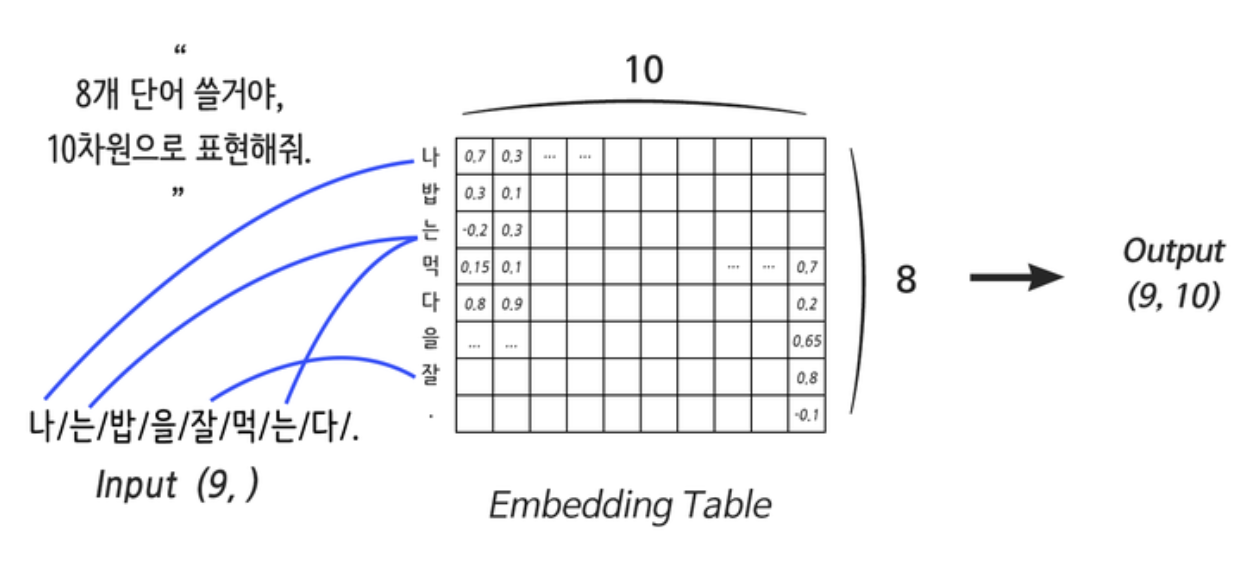

각 단어를 원-핫 인코딩해서 Linear 연산을 하는 것이 바로 파란 선의 정체였습니다! 원-핫 인코딩을 위한 단어 사전을 구축하고 단어를 사전의 인덱스로 변환만 해주면 Embedding 레이어를 완벽하게 사용할 수 있다는 겁니다. 많은 자연어처리 모델에서 문장 데이터 속 단어들을 단어 사전의 인덱스 숫자로 표현했다가 모델에 입력하게 되는 것을 보게 되는데, 사실은 이렇게 인덱스를 원-핫 임베딩으로 변환한 후 Embedding 레이어의 입력으로 넣어주는 처리를 하고 있는 것입니다.

이제 Tensorflow에서 Embedding 레이어를 선언하는 법만 배우면 완벽하겠죠? 아래 코드로 확인해 봅시다!

In [3]:
some_words = tf.constant([[3, 57, 35]])
# 3번 단어 / 57번 단어 / 35번 단어로 이루어진 한 문장입니다.

print("Embedding을 진행할 문장:", some_words.shape)
embedding_layer = tf.keras.layers.Embedding(input_dim=64, output_dim=100)
# 총 64개의 단어를 포함한 Embedding 레이어를 선언할 것이고,
# 각 단어는 100차원으로 분산표현 할 것입니다.

print("Embedding된 문장:", embedding_layer(some_words).shape)
print("Embedding Layer의 Weight 형태:", embedding_layer.weights[0].shape)

Embedding을 진행할 문장: (1, 3)
Embedding된 문장: (1, 3, 100)
Embedding Layer의 Weight 형태: (64, 100)


Embedding 레이어는 아주 쉽지만 주의사항이 하나 있습니다. 기본적으로 딥러닝은 미분을 기반으로 동작하는데, Embedding 레이어는 그저 단어를 대응 시켜 줄 뿐이니 미분이 불가능합니다. 따라서 신경망 설계를 할 때, **어떤 연산 결과를 Embedding 레이어에 연결시키는 것은 불가능**합니다. 정확히 이해하고자 하면 어려우니, 지금은 주의사항을 숙지하는 것만으로 충분합니다. Embedding 레이어는 입력에 직접 연결되게 사용해야 한다는 것을 꼭 기억해 주세요! 그리고 그 입력은 원-핫 인코딩된 단어 벡터의 형태일 때가 이상적입니다.

그렇다면 Embedding 레이어를 통해 이렇게 멋지게 분산표현으로 만든 문장은 어떻게 다루면 좋을까요? 지금까지 배운 레이어 중에는 적합한 게 썩 떠오르지 않죠? 바로 다음 단계에서 **문장 데이터에 특화된 레이어**를 배워 볼 겁니다!

# 21-4. 순차적인 데이터! Recurrent 레이어 (1) RNN

**문장**이나 **영상**, 음성 등의 데이터는 한 장의 이미지 데이터와는 사뭇 다른 특성을 가집니다. 바로 **순차적인(Sequential)** 특성인데요, "시간"의 개념을 도입해 생각하면 이해가 되실 겁니다.

나는 밥을 [ ]는다.라는 예문을 봅시다. 빈칸에 들어갈 말이 먹이라는 것은 다들 아실 겁니다. 그 근거는 아마도 먹이 등장하기 전 시점의 밥이라는 단어 때문이겠죠? 생각해보면 는이라는 말도 나가 먼저 등장한 후에 결정된 단어일 것입니다. 같은 맥락으로 영상 데이터도 뜬금없는 이미지의 나열이 아닙니다. 모두 순차적인 특성을 가지고 있죠!

데이터의 나열 사이에 연관성이 없다고 해서 **순차적인 데이터가 아니라고 할 수는 없습니다.** [1, 2, 3, 오리, baby, 0.7] 라는 데이터도 요소들 간의 연관성이 없지만 **시퀀스 데이터**라고 칭합니다.

하지만 인공지능이 예측을 하기 위해선 요소 간의 연관성이 있어야만 합니다. 따라서 딥러닝에서 말하는 시퀀스 데이터는 **순차적인 특성을 필수로 갖는다**고 할 수 있습니다.

이런 순차 데이터를 처리하기 위해 고안된 것이 바로 Recurrent Neural Network 또는 Recurrent 레이어(이하 RNN) 입니다. 반복되는 성격을 가지고 있다고 해서 Recurrent라는 이름이 붙었습니다.

RNN은 연속성을 다루는 레이어다 보니 한 장의 이미지로 보는 것보다는 움직이는 GIF 쪽이 이해하기 수월합니다. 아래의 참고 자료가 도움이 될 것입니다.

- Illustrated Guide to Recurrent Neural Networks (https://towardsdatascience.com/illustrated-guide-to-recurrent-neural-networks-79e5eb8049c9)

RNN의 입력으로 들어가는 **모든 단어만큼 Weight를 만드는 게 아님**에 유의합니다. (입력의 차원, 출력의 차원)에 해당하는 단 하나의 Weight를 순차적으로 업데이트하는 것이 RNN입니다. 그렇다 보니 한 문장을 읽고 처리하는 데에도 여러 번의 연산이 필요해 다른 레이어에 비해 느리다는 단점이 있어요.

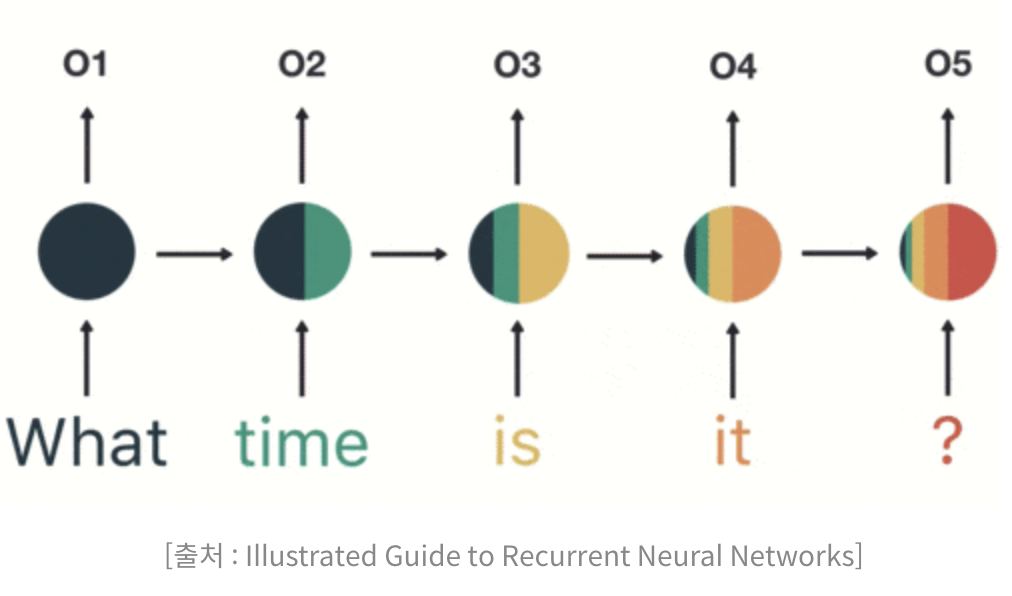

위 그림도 그것을 표현하여 첫 입력인 What의 정보가 마지막 입력인 ?에 다다라서는 거의 희석된 모습을 보여주고 있죠. 이것이 RNN의 고질적인 문제점인데, 입력의 앞부분이 뒤로 갈수록 옅어져 손실이 발생합니다. 이를 기울기 소실(Vanishing Gradient) 문제라고 합니다. 이를 해결하기 위한 시도는 후술하고, 우선은 코드로 어떻게 작성하는지 배워보도록 하죠!

In [4]:
sentence = "What time is it ?"
dic = {
    "is": 0,
    "it": 1,
    "What": 2,
    "time": 3,
    "?": 4
}

print("RNN에 입력할 문장:", sentence)

sentence_tensor = tf.constant([[dic[word] for word in sentence.split()]])

print("Embedding을 위해 단어 매핑:", sentence_tensor.numpy())
print("입력 문장 데이터 형태:", sentence_tensor.shape)

embedding_layer = tf.keras.layers.Embedding(input_dim=len(dic), output_dim=100)
emb_out = embedding_layer(sentence_tensor)

print("\nEmbedding 결과:", emb_out.shape)
print("Embedding Layer의 Weight 형태:", embedding_layer.weights[0].shape)

rnn_seq_layer = \
tf.keras.layers.SimpleRNN(units=64, return_sequences=True, use_bias=False)
rnn_seq_out = rnn_seq_layer(emb_out)

print("\nRNN 결과 (모든 Step Output):", rnn_seq_out.shape)
print("RNN Layer의 Weight 형태:", rnn_seq_layer.weights[0].shape)

rnn_fin_layer = tf.keras.layers.SimpleRNN(units=64, use_bias=False)
rnn_fin_out = rnn_fin_layer(emb_out)

print("\nRNN 결과 (최종 Step Output):", rnn_fin_out.shape)
print("RNN Layer의 Weight 형태:", rnn_fin_layer.weights[0].shape)

RNN에 입력할 문장: What time is it ?
Embedding을 위해 단어 매핑: [[2 3 0 1 4]]
입력 문장 데이터 형태: (1, 5)

Embedding 결과: (1, 5, 100)
Embedding Layer의 Weight 형태: (5, 100)

RNN 결과 (모든 Step Output): (1, 5, 64)
RNN Layer의 Weight 형태: (100, 64)

RNN 결과 (최종 Step Output): (1, 64)
RNN Layer의 Weight 형태: (100, 64)


어떤 문장이 긍정인지 부정인지 나누기 위해서라면 **문장을 모두 읽은 후, 최종 Step의 Output**만 확인해도 판단이 가능합니다. 하지만 문장을 생성하는 경우라면 **이전 단어를 입력으로 받아 생성된 모든 다음 단어, 즉 모든 Step에 대한 Output**이 필요하죠. 그것은 위 코드에서 tf.keras.layers.SimpleRNN 레이어의 return_sequences 인자를 조절함으로써 조절할 수 있습니다!

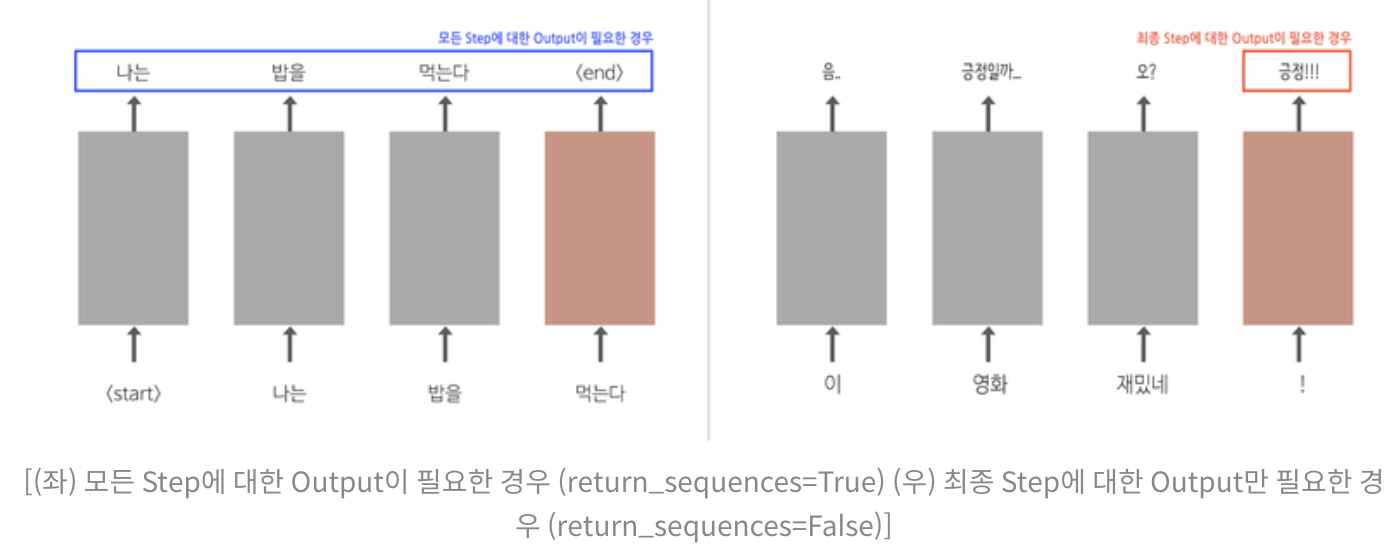

In [5]:
# 위 코드에서 RNN 레이어에 대한 부분은 이렇게 바꿀 수도 있습니다. 동작하는 방식은 위 코드와 동일합니다.

lstm_seq_layer = tf.keras.layers.LSTM(units=64, return_sequences=True, use_bias=False)
lstm_seq_out = lstm_seq_layer(emb_out)

print("\nLSTM 결과 (모든 Step Output):", lstm_seq_out.shape)
print("LSTM Layer의 Weight 형태:", lstm_seq_layer.weights[0].shape)

lstm_fin_layer = tf.keras.layers.LSTM(units=64, use_bias=False)
lstm_fin_out = lstm_fin_layer(emb_out)

print("\nLSTM 결과 (최종 Step Output):", lstm_fin_out.shape)
print("LSTM Layer의 Weight 형태:", lstm_fin_layer.weights[0].shape)


LSTM 결과 (모든 Step Output): (1, 5, 64)
LSTM Layer의 Weight 형태: (100, 256)

LSTM 결과 (최종 Step Output): (1, 64)
LSTM Layer의 Weight 형태: (100, 256)


처음 보는 LSTM이라는 레이어가 등장했습니다! Embedding 벡터의 차원수(unit)의 크기가 동일할 경우(위 예에서는 units=64), Weight의 크기가 위에서 사용했던 SimpleRNN의 4배나 되는 것을 볼 수 있는데, 왜 이런 RNN 레이어가 등장하게 된 것일까요?

# 21-5. 순차적인 데이터! Recurrent 레이어 (2) LSTM

LSTM은 Long Short-Term Memory의 약어로 기울기 소실 문제를 해결하기 위해 고안된 RNN 레이어입니다.

딥러닝 네트워크는 에러에 대한 각 가중치의 미분을 구해 업데이트하는 백프로퍼게이션을 통해 학습하죠. RNN의 네트워크 구조 특성상, 입력되는 문장이 길수록 초기에 입력된 단어들의 미분 값이 매우 작아지거나 커지는 현상이 발생합니다. 만약 미분 값이 너무 작아진다면 이를 Vanishing Gradient라고 부르고, 너무 커진다면 Exploding Gradient라고 합니다. 전자의 경우, 가중치 업데이트가 잘 안되니 학습이 거의 이뤄지지 않습니다. 후자의 경우, 가중치 업데이트가 너무 크니 학습이 불안정하겠죠.

수식적으로 자세히 알고 싶은 분들은 아래 링크를 참고해주세요.

- Recurrent Neural Networks (RNN) - The Vanishing Gradient Problem
 (https://www.superdatascience.com/blogs/recurrent-neural-networks-rnn-the-vanishing-gradient-problem)
- LSTM가 gradient vanishing에 강한이유? (https://curt-park.github.io/2017-04-03/why-is-lstm-strong-on-gradient-vanishing/)

LSTM 은 기본적인 바닐라(Simple) RNN보다 4배나 큰 Weight를 가지고 있음을 이전 스텝에서 확인했죠? 4배 깊은 RNN이라고 표현하기보다, 4종류의 서로 다른 Weight를 가진 RNN이라고 이해하시는 것이 좋습니다. 각 Weight들은 Gate라는 구조에 포함되어 어떤 정보를 기억하고, 어떤 정보를 다음 스텝에 전달할지 등을 결정합니다!

LSTM에는 Cell state 라는 새로운 개념이 추가되는데, 긴 문장이 들어와도 이 Cell state 를 통해 오래된 기억 또한 큰 손실 없이 저장해줍니다. 위의 두 번째 참고 링크를 보시면 수식으로도 이해하실 수 있을 것입니다. 그리고 앞서 언급한 Gate 들이 Cell state에 정보를 추가하거나 빼주는 역할을 합니다.

멋진 아이디어엔 언제나 멋진 정리 글들이 뒤따르죠, LSTM에 대한 수많은 글 중 필자는 아래 웹페이지를 추천합니다! 같이 읽고 좀 더 깊은 이해를 가져보도록 해요 🙂 그리고 다음 이어지는 질문에도 답해 봅시다.

- Long Short-Term Memory (LSTM) 이해하기 (https://dgkim5360.tistory.com/entry/understanding-long-short-term-memory-lstm-kr)

Q4. LSTM은 3개의 Gate Layer를 갖습니다. 각각은 무엇이며 어떤 역할을 하나요

A4.
   - Forget Gate Layer : cell state의 기존 정보를 얼마나 잊어버릴지를 결정하는 gate
   - Input Gate Layer : 새롭게 만들어진 cell state를 기존 cell state에 얼마나 반영할지를 결정하는 gate
   - Output Gate Layer : 새롭게 만들어진 cell state를 새로운 hidden state에 얼마나 반영할지를 결정하는 gate

Q5. 2000년에 소개된 LSTM의 변형 모델에 소개된 "엿보기 구멍(peephole connection)"이란 어떤 것인가요?

A5. 기존 LSTM은 Gate layer들이 input과 hidden state만을 참조하여 값을 결정하였습니다. 그에 반해, 엿보기 구멍이란 Gate layer들이 cell state를 쳐다보게 만드는 것입니다.

Q6. 2014년에 소개된 GRU는 지금도 많이 사용되고 있습니다, GRU의 특징을 간단하게 적어보세요.

A6. LSTM의 Forget Gate와 Inpurt Gate를 Update Gate로 합쳤다. 그리고 Cell State와 Hidden State를 합쳤다.

윗글에서 LSTM의 변형 모델로 소개되는 Gated Recurrent Unit(GRU)도 tf.keras.layers.GRU() 로 선언해서 사용할 수 있답니다.

가장 대표적으로 사용되는 두 모델이니 GRU에 대한 개념을 조금 더 살펴보도록 해요.

큰 줄기만 가볍게 이해합시다! 아래 웹페이지를 살펴보고 이어지는 질문에도 답해 봅시다. 🙂

- Gated Recurrent Units(GRU) (https://yjjo.tistory.com/18)

Q7. LSTM과 GRU는 비슷한 성능을 보이는데요, 그럼에도 GRU의 장점이라고 꼽히는 부분이 있습니다. 무엇일까요?
A7. LSTM에 비해 GRU가 학습할 가중치(Weight)가 더 적다. (LSTM의 1/4)

둘 다 각각의 장단점을 가지고 있기에 뭐가 더 좋다고 단정 지을 수는 없습니다. 윗글이 말하듯이 LSTM은 GRU에 비해 Weight가 많기 때문에 충분한 데이터가 있는 상황에 적합하고, 반대로 GRU는 적은 데이터에도 웬만한 학습 성능을 보여주죠. 이것저것 사용해보며 여러분의 프로젝트에 적합한 레이어를 찾아보세요!

양방향(Bidirectional) RNN
---
마지막으로 살펴볼 것은 진행 방향에 변화를 준 RNN입니다. 날이 너무 [ ] 에어컨을 켰다 라는 예문이 있다면, 빈칸에 들어갈 말이 '더워서'인 것은 어렵지 않게 유추할 수 있습니다. 그 근거는 아마도 '에어컨을 켰다' 는 말 때문이겠죠? 하지만 우리가 지금까지 배운 RNN은 모두 순방향이었기 때문에 에어컨이라는 정보가 없는 채로 빈칸에 들어갈 단어를 생성해야 합니다. 자칫하면 날이 너무 추워서 에어컨을 켰다 는 이상한 문장이 생성될지도 몰라요!

이를 해결하기 위해 제안된 것이 양방향(Bidirectional) RNN입니다. 말이 조금 어렵지만, 그저 진행 방향이 반대인 RNN을 2개 겹쳐놓은 형태랍니다!

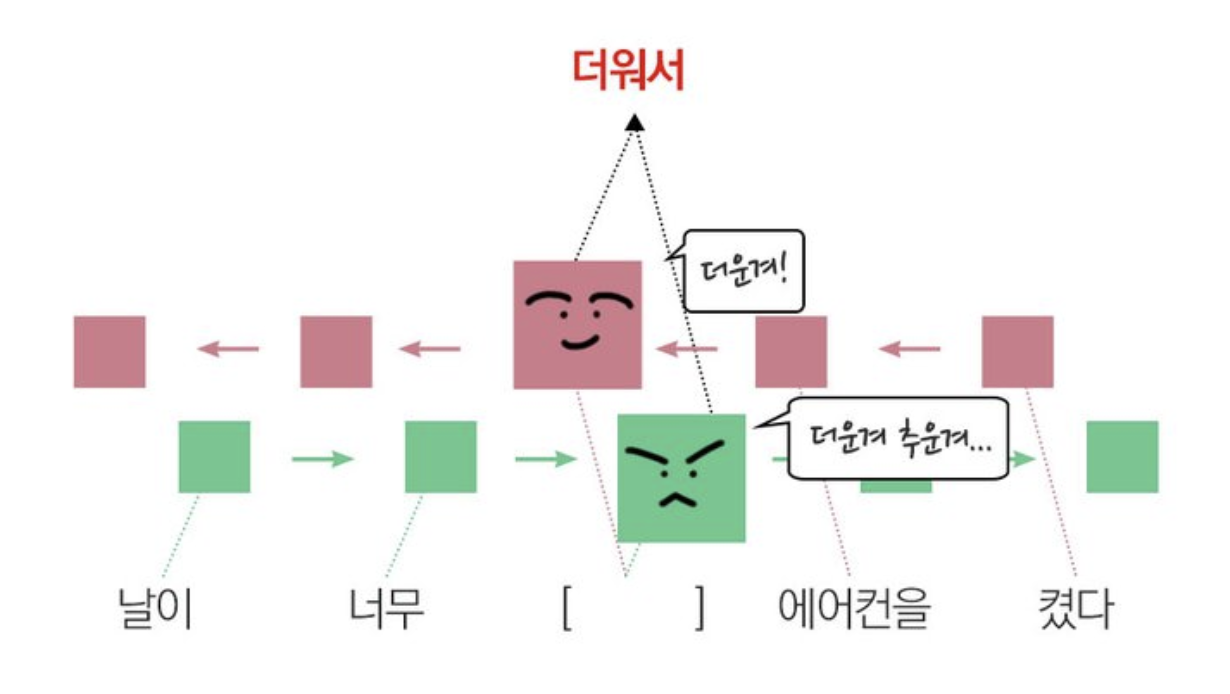

원리만큼이나 간단하게 Tensorflow에서도 LSTM 등 모든 RNN 계열 레이어에 쉽게 적용시킬 수 있습니다. 사용하고자 하는 레이어를 tf.keras.layers.Bidirectional() 로 감싸주기만 하면 돼요!

양방향(Bidirectional) RNN이 필요한 상황은 어떤 것일까요? 문장 분석이나 생성보다는 주로 기계번역 같은 테스크에 유리합니다. 사람도 대화를 하면서 듣고 이해하는 것은 순차적으로 들으면서 충분히 예측을 동원해서 잘 해냅니다. 그러나 문장을 번역하려면 일단은 번역해야 할 문장 전체를 끝까지 분석한 후 번역을 시도하는 것이 훨씬 유리합니다. 그래서 자연어처리를 계속하면서 알게 되겠지만, 번역기를 만들 때 양방향(Bidirectional) RNN 계열의 네트워크, 혹은 동일한 효과를 내는 Transformer 네트워크를 주로 사용하게 될 것입니다.

In [7]:
import tensorflow as tf

sentence = "What time is it ?"
dic = {
    "is": 0,
    "it": 1,
    "What": 2,
    "time": 3,
    "?": 4
}

sentence_tensor = tf.constant([[dic[word] for word in sentence.split()]])

embedding_layer = tf.keras.layers.Embedding(input_dim=len(dic), output_dim=100)
emb_out = embedding_layer(sentence_tensor)

print("입력 문장 데이터 형태:", emb_out.shape)

bi_rnn = \
tf.keras.layers.Bidirectional(
    tf.keras.layers.SimpleRNN(units=64, use_bias=False, return_sequences=True)
)
bi_out = bi_rnn(emb_out)

print("Bidirectional RNN 결과 (최종 Step Output):", bi_out.shape)

입력 문장 데이터 형태: (1, 5, 100)
Bidirectional RNN 결과 (최종 Step Output): (1, 5, 128)


Bidirectional RNN은 순방향 Weight와 역방향 Weight를 각각 정의하므로 우리가 앞에서 배운 RNN의 2배 크기 Weight가 정의됩니다. units를 64로 정의해 줬고, 입력은 Embedding을 포함하여 (1, 5, 100), 그리고 양방향에 대한 Weight를 거쳐 나올 테니 출력은 (1, 5, 128) 이 맞죠?

# 21-6. 마무리

이렇게 두 편에 걸쳐 딥러닝 전반으로 사용되는 레이어들에 대해 알아봤습니다. 약간은 머리가 아플 수 있지만, 한 번 직관을 얻어두면 앞으로 유용하게 사용될 겁니다. 이전 코스에서 얘기한 것처럼 신경망은 결국 레이어들의 결합으로 이뤄지니 하나하나 파고들자면 여러분은 이제 모르는 부분이 없을 거예요! 그러니 앞으로는 지레 겁먹지 않아도 됩니다 🙂

개념을 이해하는 것과 활용하는 것은 또 약간의 차이가 있죠? 아직 막연하다는 느낌이 들 수 있지만, 천 리 길도 한 걸음부터이니 차근차근 나아가다 보면 금방 실력이 늘어있는 자신을 발견할 수 있을 거예요. 레고 블록을 다루듯 능수능란하게 딥러닝 모델을 다루게 될 그날까지 파이팅입니다!!